In [1]:
from sympy import *
import sympy
from HeaderP import *

In [52]:
pwd

'/Users/yl4331/Desktop/Jdot'

# FC stars

In [44]:
#teffcut, pcut, a, b, b2, c, d, d2  = symbols('t_{cut}, p_{cut}, a, b, b_2, c, d, d_2', constant = True)
#wteff, wprot = symbols('w_t, w_p', constant = True, positive=True)
sample_PC = np.load('../NewGyroKineage/sample_FC.npy')

allkeys_name = ['a', 'b', 'b2', 'c', 'd', 'log_amp', 'log_scale1',
           'log_scale2', 'prot_cut', 'w_prot']
allkeys_fc = {'a':__, 'b':__, 'b2':__, 'c':__, 'd':__, 'log_amp':__, 'log_scale1':__,
           'log_scale2':__, 'prot_cut':__, 'w_prot':__}
for i in range(np.shape(sample_PC.T)[1]):
    mcmc = np.percentile((sample_PC.T)[:, i], [16, 50, 84])
    allkeys_fc[allkeys_name[i]] = mcmc[1]
    

def getage_FC_prot(logprot, teff):
    teffnorm = (3500.-teff)/500.
    prot = np.power(10.,logprot)
    # Prot broken low
    stepfunc_low_prot = 1.0 / (1.0 + np.exp(-(np.log10(allkeys_fc['prot_cut']) - logprot) / abs(allkeys_fc['w_prot'])))
    stepfunc_high_prot = 1.0 / (1.0 + np.exp(-(-np.log10(allkeys_fc['prot_cut']) + logprot) / abs(allkeys_fc['w_prot'])))
    
    mod_high_prot = np.power(prot,allkeys_fc["b"])
    mod_high_prot = mod_high_prot*stepfunc_high_prot
    
    mod_low_prot = np.power(prot,allkeys_fc["b2"])*np.power(allkeys_fc["prot_cut"],allkeys_fc["b"]-allkeys_fc["b2"])
    mod_low_prot = mod_low_prot*stepfunc_low_prot
    
    prot_func = mod_high_prot+mod_low_prot
    
    # teff broken low
    mod_high_teff = np.power(teffnorm-allkeys_fc["c"],allkeys_fc["d"])
    teff_func = mod_high_teff
    
    return allkeys_fc["a"]*prot_func*teff_func


In [45]:
allkeys_fc

{'a': 0.7743629556082671,
 'b': 0.3665635466648285,
 'b2': 1.8106426082037785,
 'c': -0.22291406162352329,
 'd': -0.6867100405798177,
 'log_amp': -1.0036252507489523,
 'log_scale1': 6.532104766369251,
 'log_scale2': -1.000937871720893,
 'prot_cut': 73.32158071845879,
 'w_prot': 0.06844997355843503}

In [46]:
#float(age_Ro.subs(teff, 3000).subs(Ro, 2))

## Function for Ro

In [47]:
def gettau_FC(teff):
    return 10.**(6.52112823e-7*teff**2. - 4.00355099e-3*teff + 8.68234621)

In [48]:
import numpy as np
protgrid = np.linspace(0.2, 2, 3000)
teffgrid = np.linspace(3000,3400,100)

#P = Ro*gettau_PC(teff)
#P = 2*np.pi/ω


In [49]:
prot_dots = np.zeros((len(teffgrid), len(protgrid)-1))
prots_plots = np.zeros((len(teffgrid), len(protgrid)-1))
prot_ages = np.zeros((len(teffgrid), len(protgrid)-1))

Ro_dots = np.zeros((len(teffgrid), len(protgrid)-1))
Ro_plots = np.zeros((len(teffgrid), len(protgrid)-1))

o_dots = np.zeros((len(teffgrid), len(protgrid)-1))
o_plots = np.zeros((len(teffgrid), len(protgrid)-1))

agediffs_prot = []

for j in trange(len(teffgrid)):
    for i in range(len(protgrid)-1):
        age_i = getage_FC_prot(protgrid[i],teffgrid[j])
        age_i1 = getage_FC_prot(protgrid[i+1],teffgrid[j])
        
        if np.isnan(float(age_i)) or (age_i1-age_i)<1e-5 or age_i1>14 or age_i1<0.6:
            prot_dots[j, i] = np.nan
            prots_plots[j, i] = np.nan
            prot_ages[j, i] = np.nan
            
            Ro_dots[j, i] = np.nan
            Ro_plots[j, i] = np.nan
            
            o_dots[j, i] = np.nan
            o_plots[j, i] = np.nan

        else:
            prot_dots[j, i] = (np.power(10,protgrid[i+1])-np.power(10,protgrid[i]))/(age_i1-age_i)
            prots_plots[j, i] = (np.power(10,protgrid[i+1])+np.power(10,protgrid[i]))/2
            
            Ro_dots[j, i] = (np.power(10,protgrid[i+1])-np.power(10,protgrid[i]))/(age_i1-age_i)/gettau_FC(teffgrid[j])
            Ro_plots[j, i] = (np.power(10,protgrid[i+1])+np.power(10,protgrid[i]))/2/gettau_FC(teffgrid[j])
            
            o_dots[j, i] = (2*np.pi/np.power(10,protgrid[i+1])-2*np.pi/np.power(10,protgrid[i]))/(age_i1-age_i)
            o_plots[j, i] = (2*np.pi/np.power(10,protgrid[i+1])+2*np.pi/np.power(10,protgrid[i]))/2
            
            prot_ages[j, i] = (age_i1+age_i)/2
            agediffs_prot.append(age_i-age_i1)


100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.62it/s]


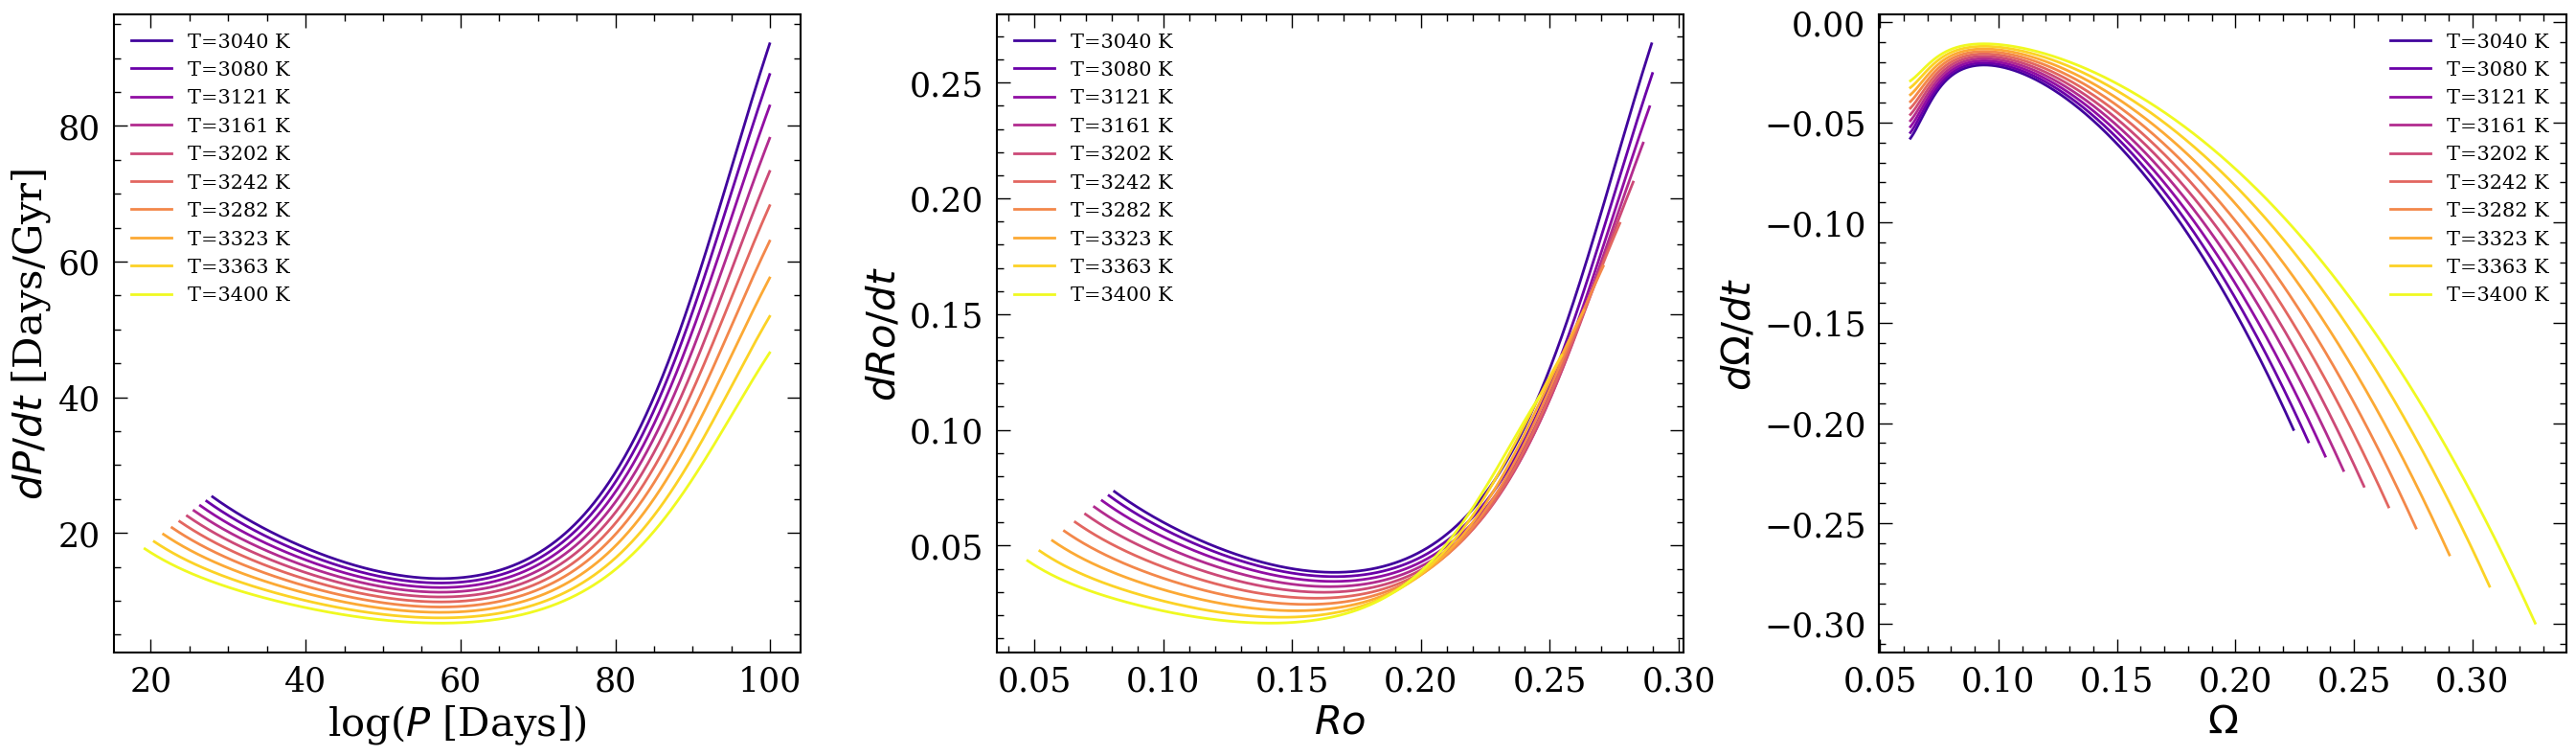

In [51]:

lineids = [10,20,30,40,50,60,70,80,90,99]
pltlines = len(lineids)

plt.figure(figsize=(27,8))
plt.subplot(1,3,1)
for i in range(pltlines):
    plt.plot(prots_plots[lineids[i],:], prot_dots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('log($P$ [Days])')
plt.ylabel('$dP/dt$ [Days/Gyr]')
#plt.xlim([0,250])
#plt.ylim([0,200])

plt.subplot(1,3,2)
for i in range(pltlines):
    plt.plot(Ro_plots[lineids[i],:], Ro_dots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('$Ro$')
plt.ylabel('$dRo/dt$')
#plt.xlim([0,2])
#plt.ylim([0,1])


plt.subplot(1,3,3)
for i in range(pltlines):
    plt.plot(o_plots[lineids[i],:], o_dots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('$\Omega$')
plt.ylabel('$d\Omega/dt$')

plt.tight_layout()

plt.savefig('FC_plt1.png')

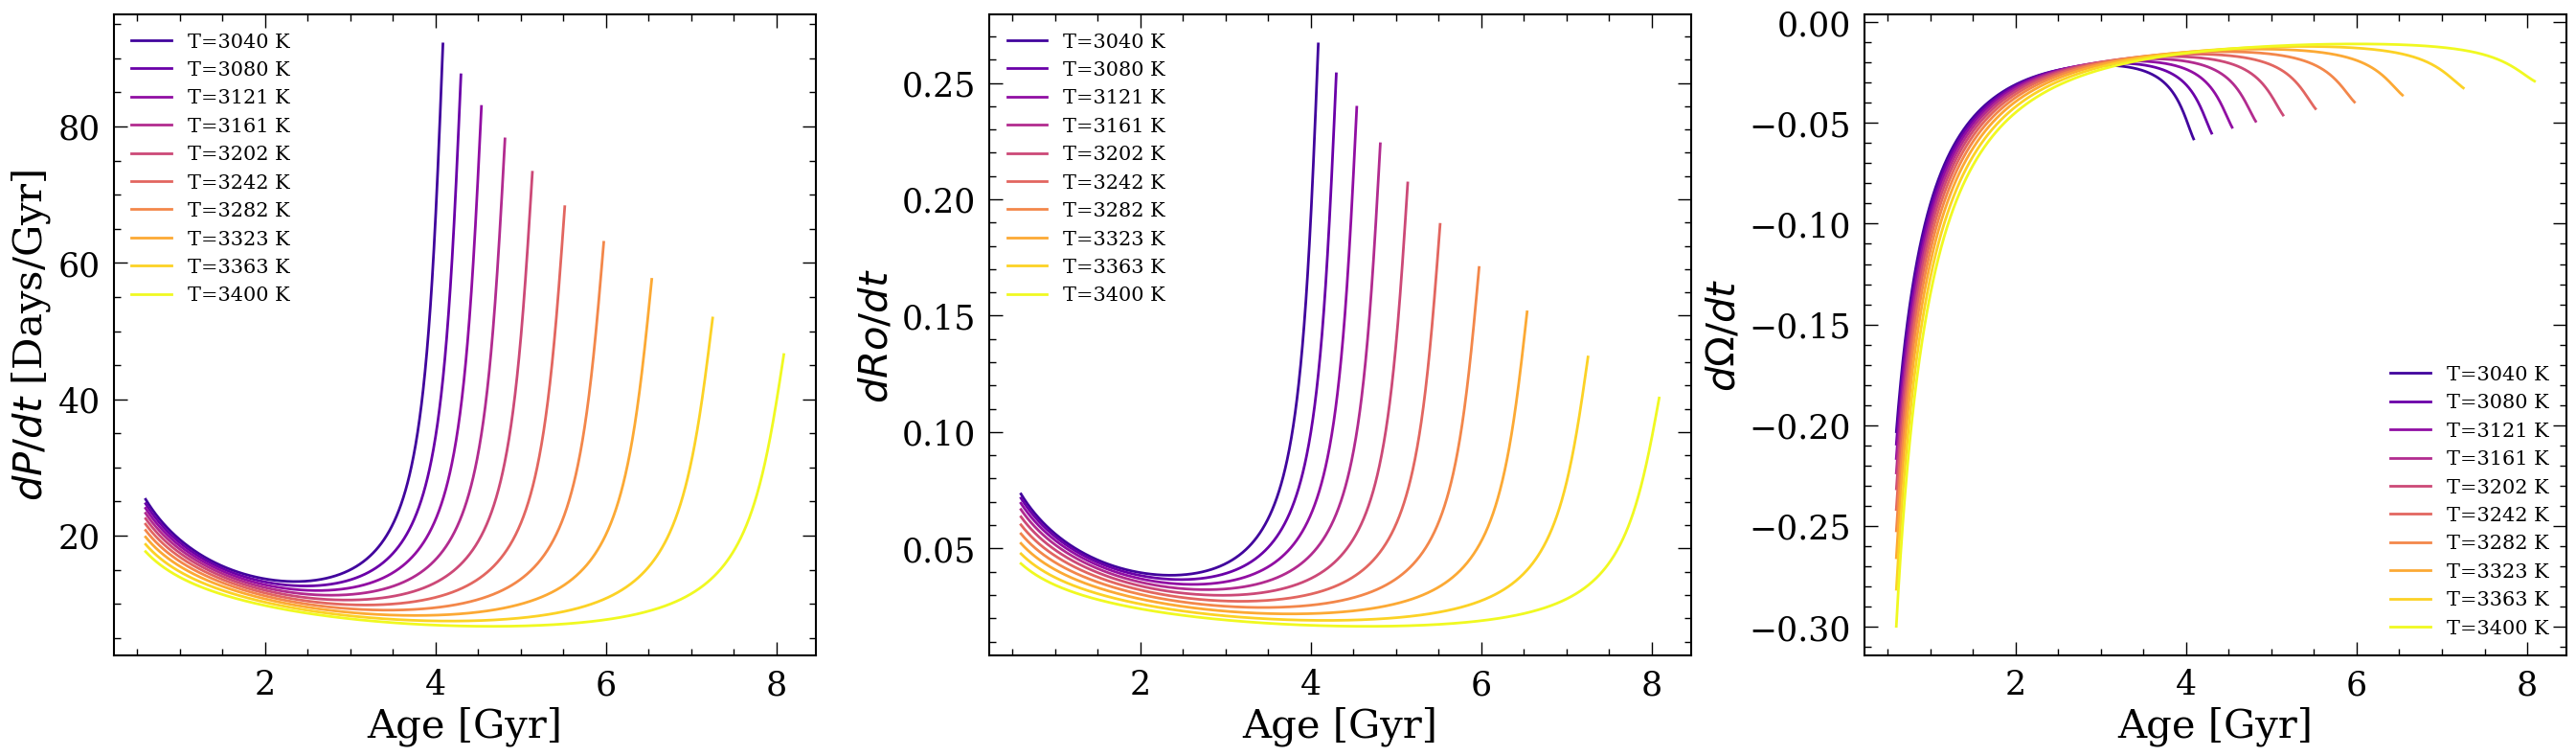

In [54]:
plt.figure(figsize=(27,8))
plt.subplot(1,3,1)
for i in range(pltlines):
    plt.plot(prot_ages[lineids[i],:], prot_dots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$dP/dt$ [Days/Gyr]')
#plt.xlim([0,250])
#plt.ylim([0,200])

plt.subplot(1,3,2)
for i in range(pltlines):
    plt.plot(prot_ages[lineids[i],:], Ro_dots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$dRo/dt$')
#plt.xlim([0,2])
#plt.ylim([0,1])


plt.subplot(1,3,3)
for i in range(pltlines):
    plt.plot(prot_ages[lineids[i],:], o_dots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$d\Omega/dt$')

plt.tight_layout()

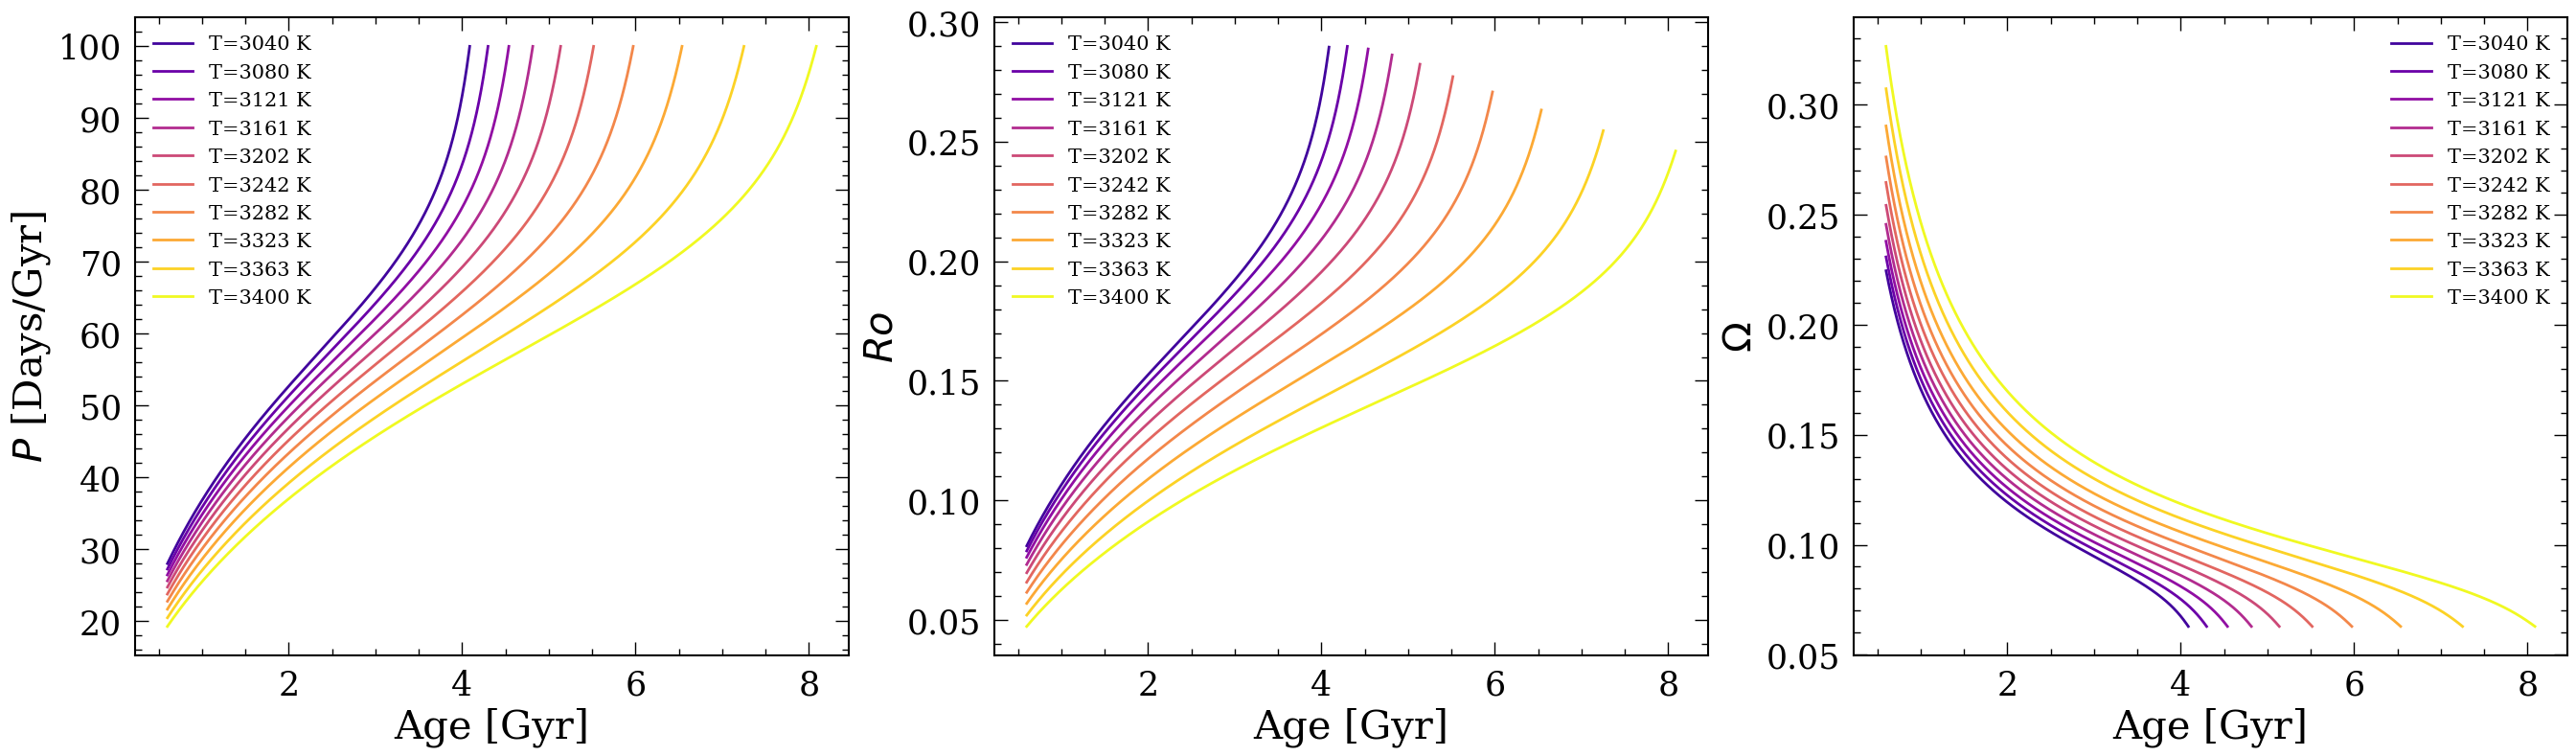

In [55]:
plt.figure(figsize=(27,8))
plt.subplot(1,3,1)
for i in range(pltlines):
    plt.plot(prot_ages[lineids[i],:], prots_plots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$P$ [Days/Gyr]')
#plt.xlim([0,250])
#plt.ylim([0,200])

plt.subplot(1,3,2)
for i in range(pltlines):
    plt.plot(prot_ages[lineids[i],:], Ro_plots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$Ro$')
#plt.xlim([0,2])
#plt.ylim([0,1])


plt.subplot(1,3,3)
for i in range(pltlines):
    plt.plot(prot_ages[lineids[i],:], o_plots[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$\Omega$')

plt.tight_layout()


Text(0, 0.5, '$n$')

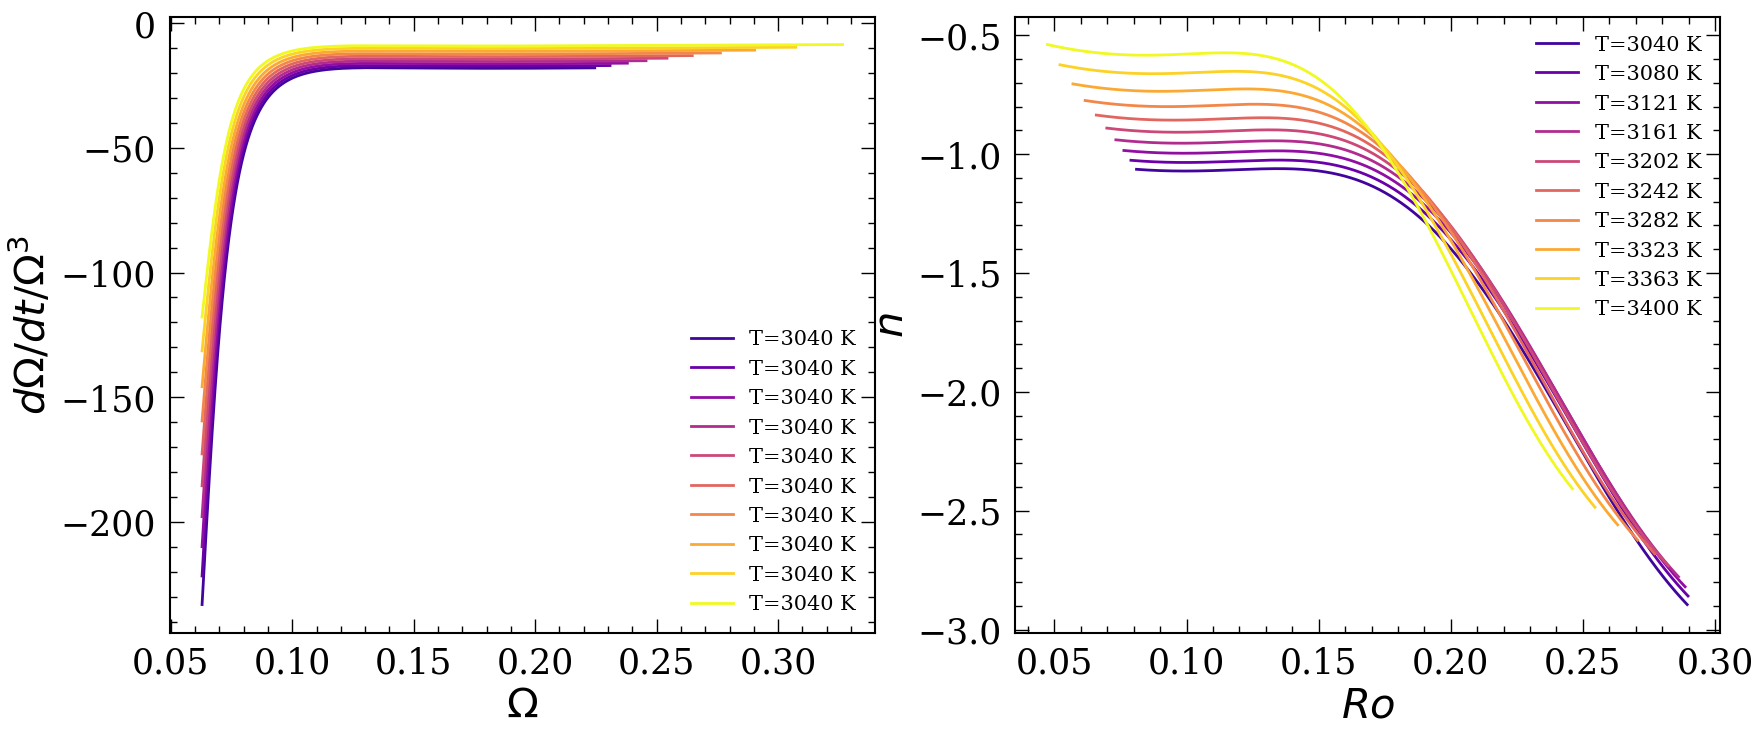

In [57]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for i in range(pltlines):
    plt.plot(o_plots[lineids[i],:], o_dots[lineids[i],:]/o_plots[lineids[i],:]**3, 
         label='T=%d K'%(teffgrid[10]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('$\Omega$')
plt.ylabel('$d\Omega/dt$/$\Omega^3$')

plt.subplot(1,2,2)
for i in range(pltlines):
    plt.plot(Ro_plots[lineids[i],:], 
             np.log(-o_dots[lineids[i],:]/o_plots[lineids[i],:]**3/4.05)/-1.4, 
         label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('$Ro$')
plt.ylabel('$n$')
#4.05*np.exp(-1.4n) for n<7

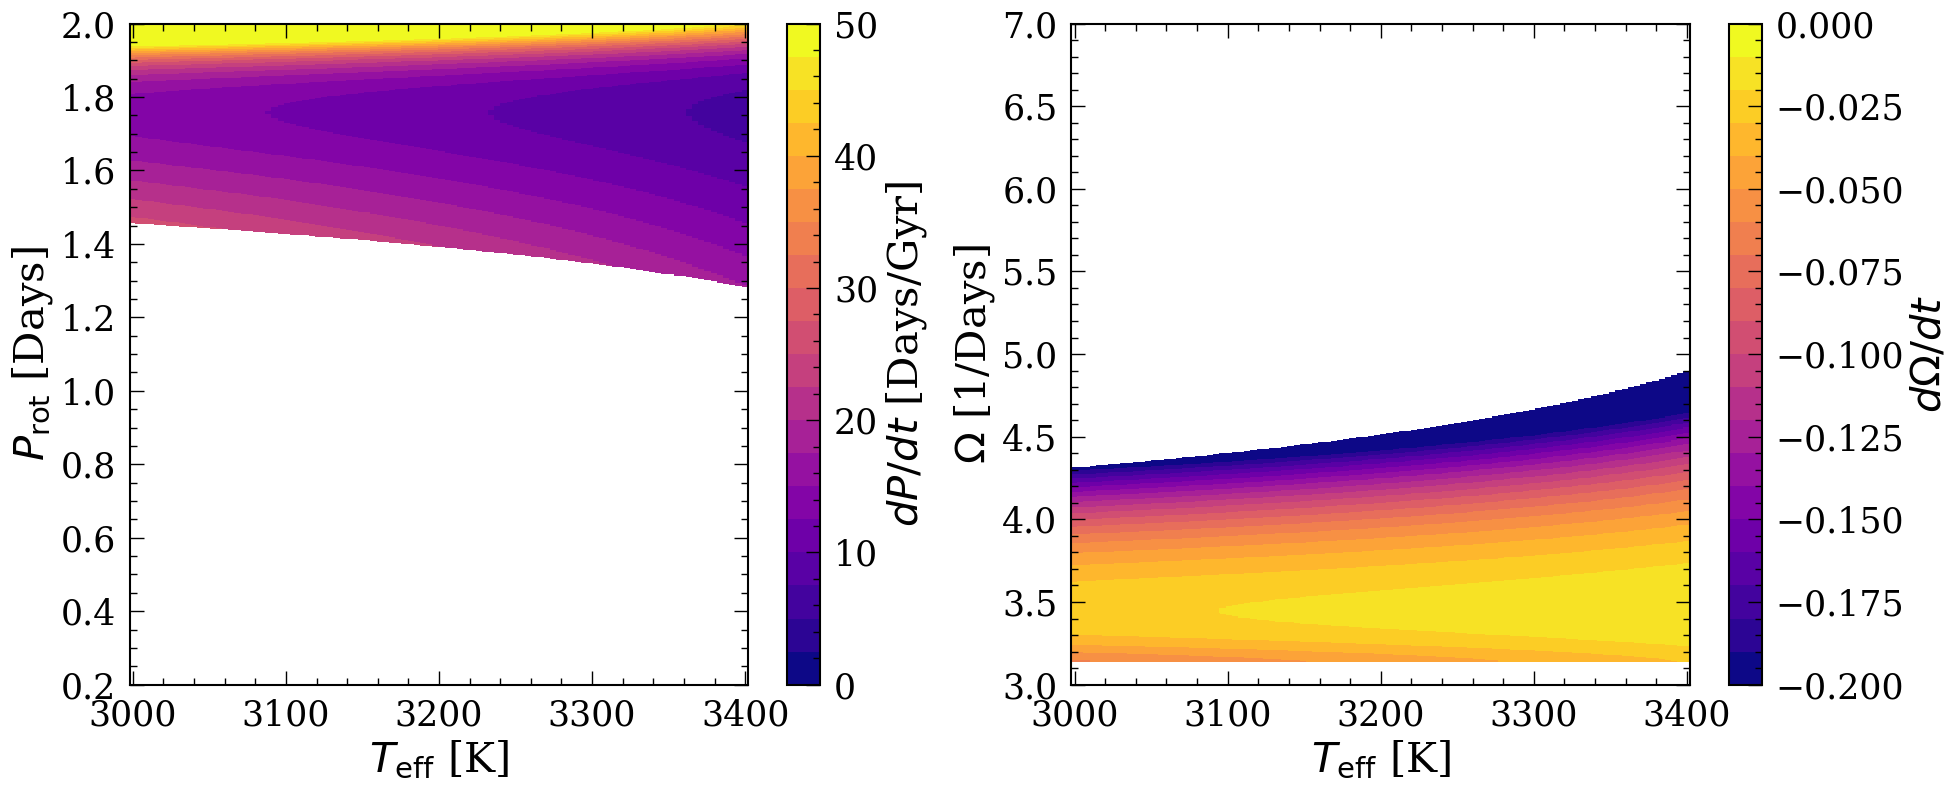

In [58]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
xx, yy = np.meshgrid(teffgrid, protgrid[:-1]/2+protgrid[1:]/2)
plt.pcolor(xx, yy, prot_dots.T, vmin=0, vmax=50, 
           cmap=plt.get_cmap('plasma',20))
plt.colorbar(label='$dP/dt$ [Days/Gyr]')
plt.ylabel('$P_{\\rm rot}$ [Days]')
plt.xlabel('$T_{\\rm eff}$ [K]')


plt.subplot(1,2,2)
xx, yy = np.meshgrid(teffgrid, 2*np.pi/protgrid[:-1]/2+2*np.pi/protgrid[1:]/2)
plt.pcolor(xx, yy, o_dots.T, vmin=-0.2, vmax=0, 
           cmap=plt.get_cmap('plasma',20))
plt.colorbar(label='$d\Omega/dt$')
plt.ylabel('$\Omega$ [1/Days]')
plt.xlabel('$T_{\\rm eff}$ [K]')
plt.ylim([3,7])

plt.tight_layout()


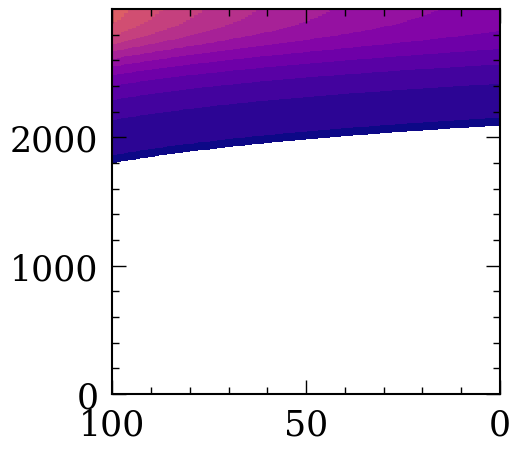

In [59]:
plt.figure(figsize=(5,5))
plt.pcolor(prot_ages.T, 
           cmap=plt.get_cmap('plasma',20), 
           vmin=0,vmax=14)
plt.gca().invert_xaxis()


# PC stars

In [60]:
#teffcut, pcut, a, b, b2, c, d, d2  = symbols('t_{cut}, p_{cut}, a, b, b_2, c, d, d_2', constant = True)
#wteff, wprot = symbols('w_t, w_p', constant = True, positive=True)
sample_PC = np.load('../NewGyroKineage/sample_PC.npy')

allkeys_name = ['a', 'b', 'b2', 'c', 'd', 'd2', 'log_amp', 'log_scale1',
           'log_scale2', 'prot_cut', 'teff_cut', 'w_prot', 'w_teff']
allkeys = {'a':__, 'b':__, 'b2':__, 'c':__, 'd':__, 'd2':__, 'log_amp':__, 'log_scale1':__,
           'log_scale2':__, 'prot_cut':__, 'teff_cut':__, 'w_prot':__, 'w_teff':__}
for i in range(np.shape(sample_PC.T)[1]):
    mcmc = np.percentile((sample_PC.T)[:, i], [16, 50, 84])
    allkeys[allkeys_name[i]] = mcmc[1]
    

def getage_PC_prot(logprot, teff):
    teffnorm = (7000.-teff)/(7000.-allkeys["teff_cut"])
    
    prot = np.power(10, logprot)
    # Prot broken low
    stepfunc_low_prot = 1.0 / (1.0 + np.exp(-(np.log10(allkeys['prot_cut']) - logprot) / abs(allkeys['w_prot'])))
    stepfunc_high_prot = 1.0 / (1.0 + np.exp(-(-np.log10(allkeys['prot_cut']) + logprot) / abs(allkeys['w_prot'])))
    
    mod_high_prot = np.power(prot,allkeys["b"])
    mod_high_prot = mod_high_prot*stepfunc_high_prot
    
    mod_low_prot = np.power(prot,allkeys["b2"])*np.power(allkeys["prot_cut"],allkeys["b"]-allkeys["b2"])
    mod_low_prot = mod_low_prot*stepfunc_low_prot
    
    prot_func = mod_high_prot+mod_low_prot
    
    # teff broken low
    stepfunc_high_teff = 1.0 / (1.0 + np.exp(-(1. - teffnorm) / abs(allkeys['w_teff'])))
    stepfunc_low_teff = 1.0 / (1.0 + np.exp(-(-1. + teffnorm) / abs(allkeys['w_teff'])))
    
    
    mod_high_teff = np.power(teffnorm-allkeys["c"],allkeys["d"])
    mod_high_teff = mod_high_teff*stepfunc_high_teff
    
    mod_low_teff = np.power(teffnorm-allkeys["c"],allkeys["d2"])*np.power(1.-allkeys["c"],allkeys["d"]-allkeys["d2"])
    mod_low_teff = mod_low_teff*stepfunc_low_teff
    teff_func = mod_high_teff+mod_low_teff
    
    return allkeys["a"]*prot_func*teff_func


## Function for Ro

In [61]:
def gettau_PC(teff):
    return 10.**(-2.51904051e-10*teff**3. + 3.73613409e-6*teff**2. - 1.85566042e-2*teff + 32.5950535)

In [62]:
import numpy as np
protgrid = np.linspace(0.2, 2.2, 3000)
teffgrid = np.linspace(3500,6500,100)

#P = Ro*gettau_PC(teff)
#P = 2*np.pi/ω


In [63]:
prot_dots_pc = np.zeros((len(teffgrid), len(protgrid)-1))
prots_plots_pc = np.zeros((len(teffgrid), len(protgrid)-1))
prot_ages_pc = np.zeros((len(teffgrid), len(protgrid)-1))

Ro_dots_pc = np.zeros((len(teffgrid), len(protgrid)-1))
Ro_plots_pc = np.zeros((len(teffgrid), len(protgrid)-1))

o_dots_pc = np.zeros((len(teffgrid), len(protgrid)-1))
o_plots_pc = np.zeros((len(teffgrid), len(protgrid)-1))

agediffs_prot = []

for j in trange(len(teffgrid)):
    for i in range(len(protgrid)-1):
        age_i = getage_PC_prot(protgrid[i],teffgrid[j])
        age_i1 = getage_PC_prot(protgrid[i+1],teffgrid[j])
        
        if np.isnan(float(age_i)) or (age_i1-age_i)<1e-5 or age_i1>14 or age_i1<0.6:
            prot_dots_pc[j, i] = np.nan
            prots_plots_pc[j, i] = np.nan
            prot_ages_pc[j, i] = np.nan
            
            Ro_dots_pc[j, i] = np.nan
            Ro_plots_pc[j, i] = np.nan
            
            o_dots_pc[j, i] = np.nan
            o_plots_pc[j, i] = np.nan

        else:
            prot_dots_pc[j, i] = (np.power(10,protgrid[i+1])-np.power(10,protgrid[i]))/(age_i1-age_i)
            prots_plots_pc[j, i] = (np.power(10,protgrid[i+1])+np.power(10,protgrid[i]))/2
            
            Ro_dots_pc[j, i] = (np.power(10,protgrid[i+1])-np.power(10,protgrid[i]))/(age_i1-age_i)/gettau_PC(teffgrid[j])
            Ro_plots_pc[j, i] = (np.power(10,protgrid[i+1])+np.power(10,protgrid[i]))/2/gettau_PC(teffgrid[j])
            
            o_dots_pc[j, i] = (2*np.pi/np.power(10,protgrid[i+1])-2*np.pi/np.power(10,protgrid[i]))/(age_i1-age_i)
            o_plots_pc[j, i] = (2*np.pi/np.power(10,protgrid[i+1])+2*np.pi/np.power(10,protgrid[i]))/2
            
            prot_ages_pc[j, i] = (age_i1+age_i)/2
            agediffs_prot.append(age_i-age_i1)


100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.95it/s]


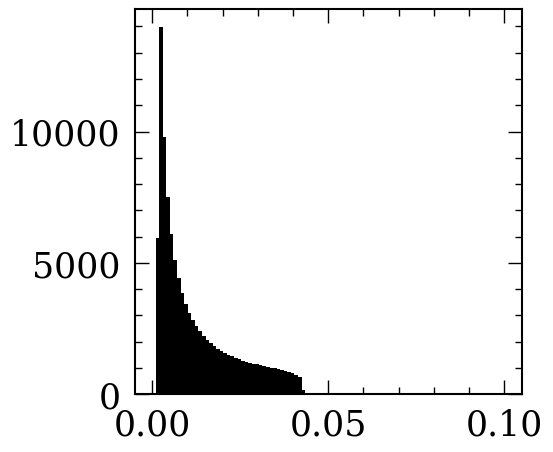

In [64]:
plt.figure(figsize=(5,5))
agediffs_prot = np.array(agediffs_prot)
plt.hist(abs(agediffs_prot), bins=np.linspace(0,0.1,100),
        color='k');


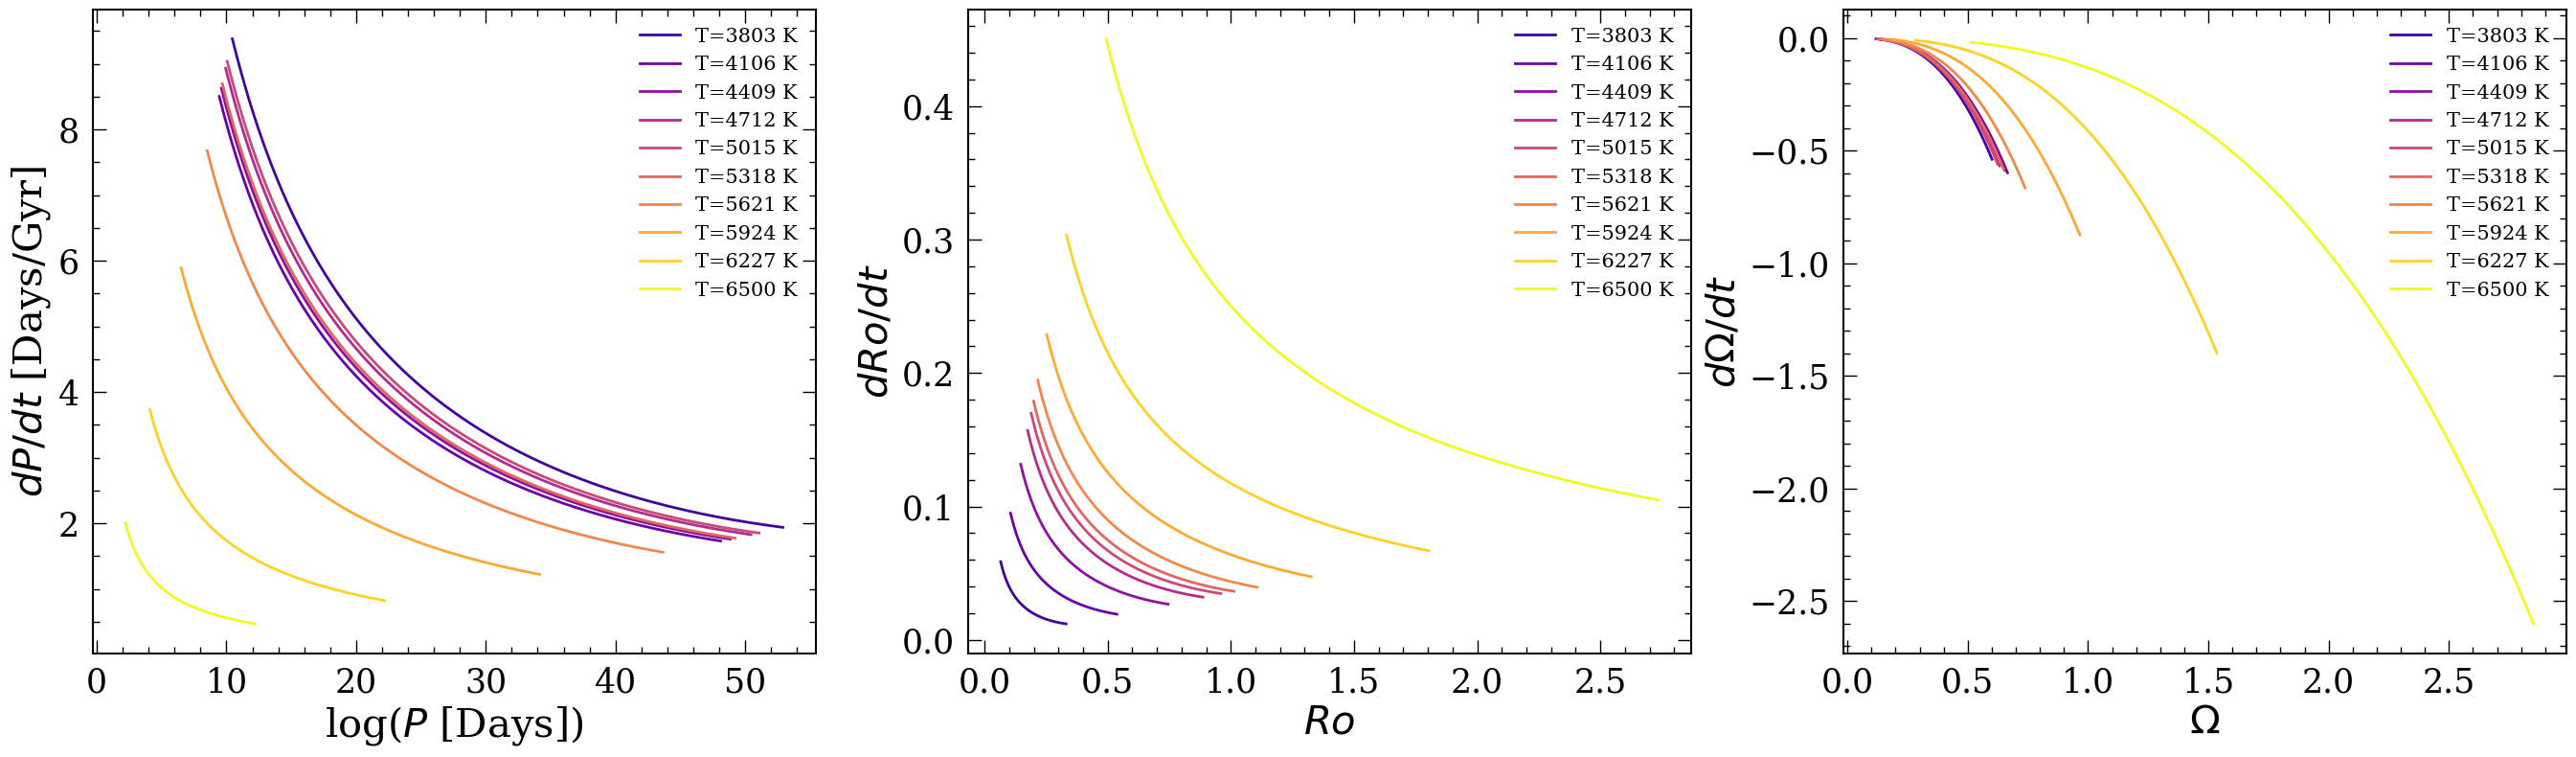

In [43]:

lineids = [10,20,30,40,50,60,70,80,90,99]
pltlines = len(lineids)

plt.figure(figsize=(27,8))
plt.subplot(1,3,1)
for i in range(pltlines):
    plt.plot(prots_plots_pc[lineids[i],:], prot_dots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('log($P$ [Days])')
plt.ylabel('$dP/dt$ [Days/Gyr]')
#plt.xlim([0,250])
#plt.ylim([0,200])

plt.subplot(1,3,2)
for i in range(pltlines):
    plt.plot(Ro_plots_pc[lineids[i],:], Ro_dots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('$Ro$')
plt.ylabel('$dRo/dt$')
#plt.xlim([0,2])
#plt.ylim([0,1])


plt.subplot(1,3,3)
for i in range(pltlines):
    plt.plot(o_plots_pc[lineids[i],:], o_dots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])

plt.legend(fontsize=15)
plt.xlabel('$\Omega$')
plt.ylabel('$d\Omega/dt$')

plt.tight_layout()

plt.savefig('PC_plt1.png')

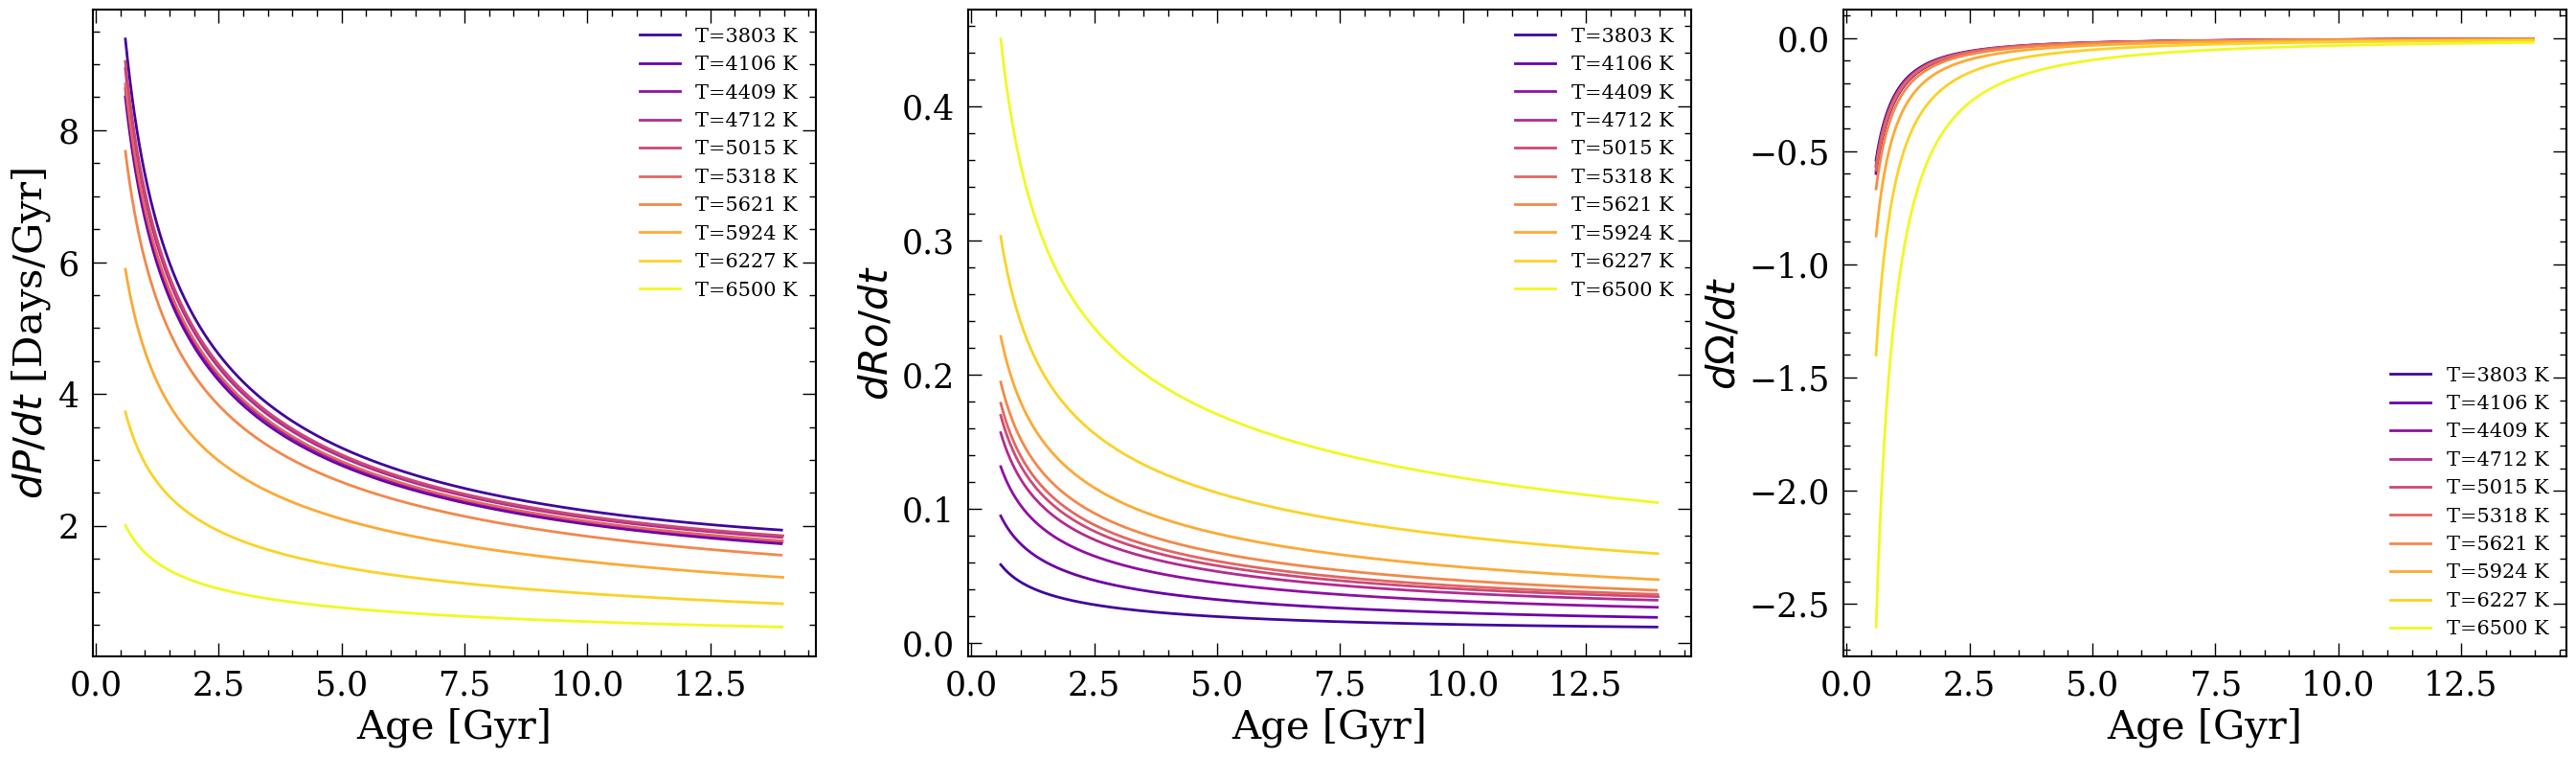

In [65]:
plt.figure(figsize=(27,8))
plt.subplot(1,3,1)
for i in range(pltlines):
    plt.plot(prot_ages_pc[lineids[i],:], prot_dots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$dP/dt$ [Days/Gyr]')
#plt.xlim([0,250])
#plt.ylim([0,200])

plt.subplot(1,3,2)
for i in range(pltlines):
    plt.plot(prot_ages_pc[lineids[i],:], Ro_dots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$dRo/dt$')
#plt.xlim([0,2])
#plt.ylim([0,1])


plt.subplot(1,3,3)
for i in range(pltlines):
    plt.plot(prot_ages_pc[lineids[i],:], o_dots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$d\Omega/dt$')

plt.tight_layout()

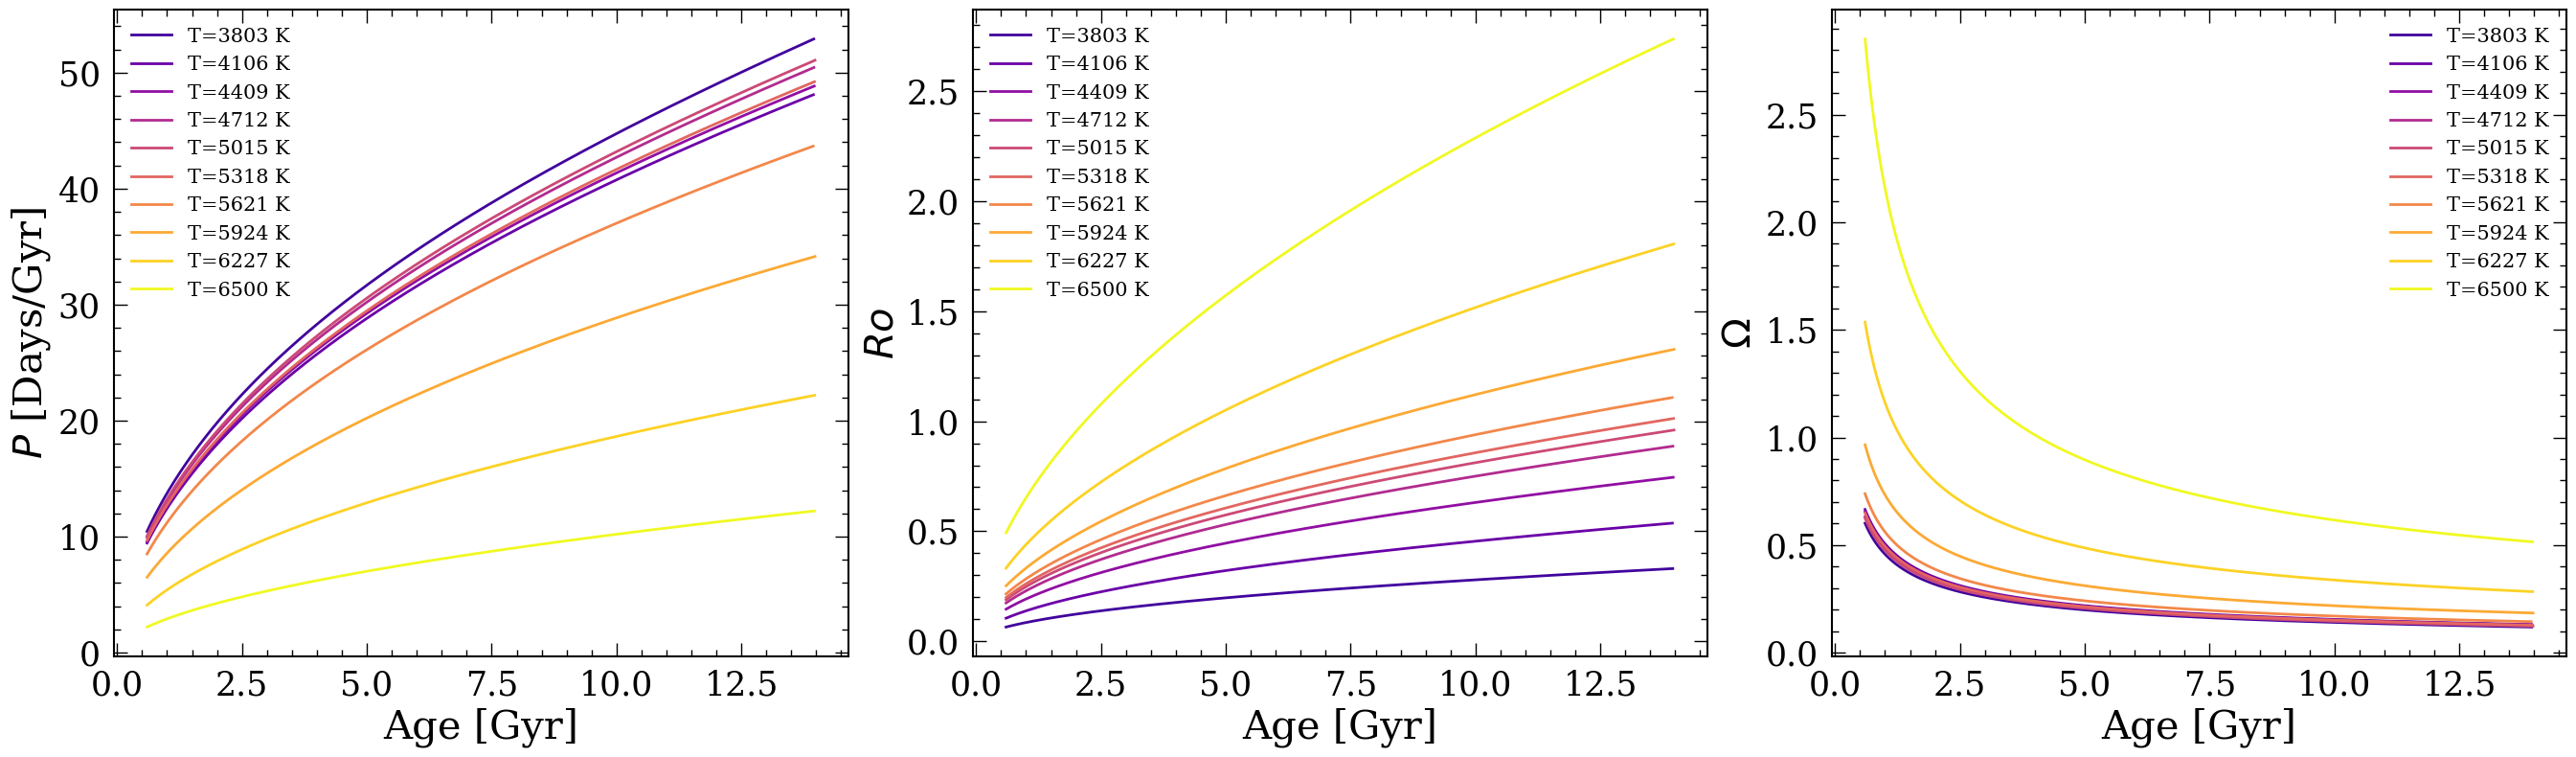

In [69]:
plt.figure(figsize=(27,8))
plt.subplot(1,3,1)
for i in range(pltlines):
    plt.plot(prot_ages_pc[lineids[i],:], prots_plots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$P$ [Days/Gyr]')
#plt.xlim([0,250])
#plt.ylim([0,200])

plt.subplot(1,3,2)
for i in range(pltlines):
    plt.plot(prot_ages_pc[lineids[i],:], Ro_plots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$Ro$')
#plt.xlim([0,2])
#plt.ylim([0,1])


plt.subplot(1,3,3)
for i in range(pltlines):
    plt.plot(prot_ages_pc[lineids[i],:], o_plots_pc[lineids[i],:], 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('Age [Gyr]')
plt.ylabel('$\Omega$')

plt.tight_layout()


Text(0, 0.5, '$n$')

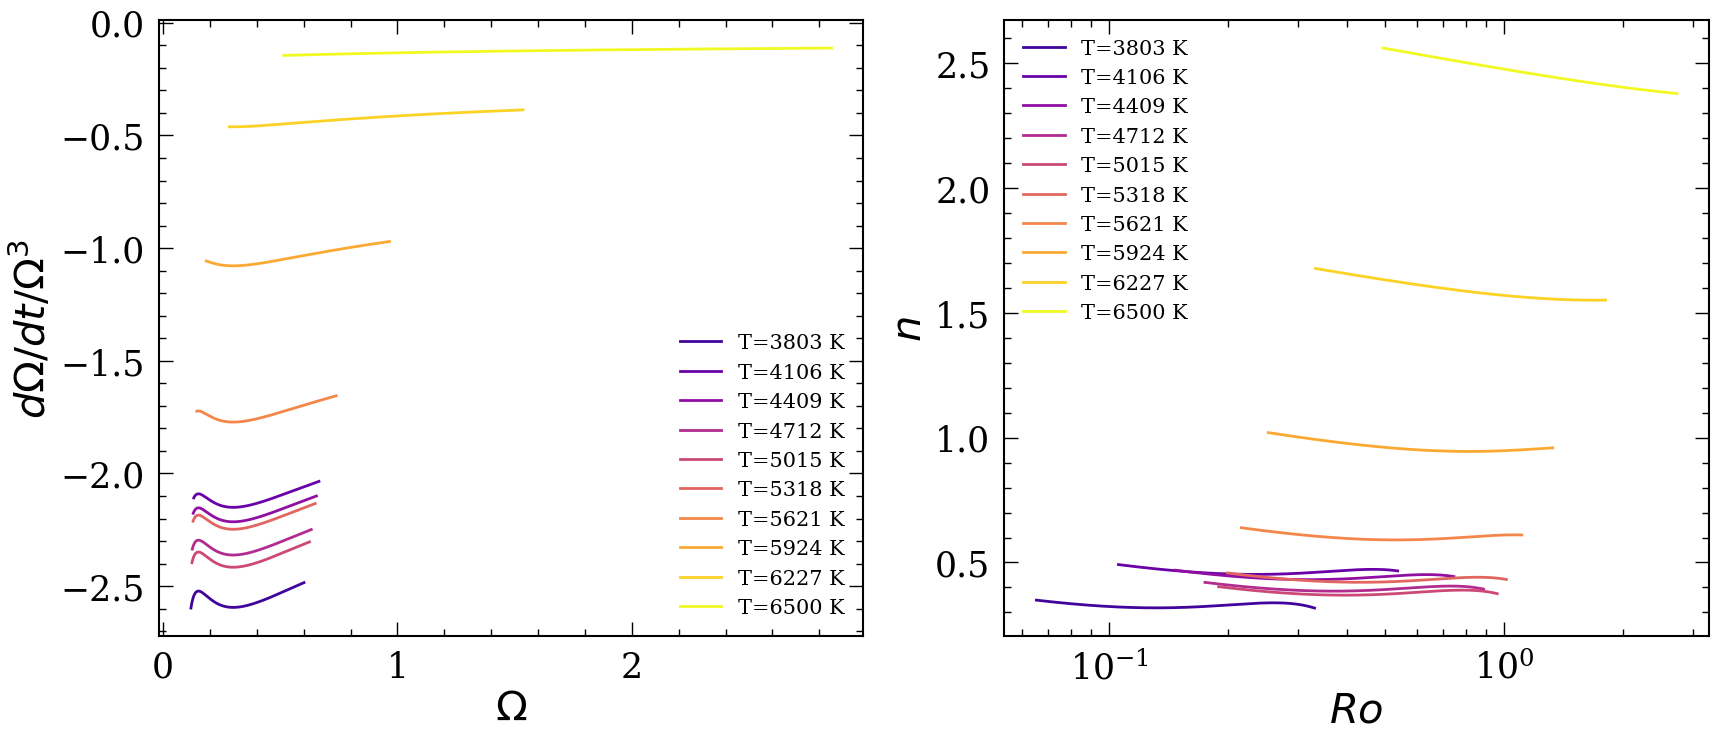

In [72]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for i in range(pltlines):
    plt.plot(o_plots_pc[lineids[i],:], 
             o_dots_pc[lineids[i],:]/o_plots_pc[lineids[i],:]**3, 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xlabel('$\Omega$')
plt.ylabel('$d\Omega/dt$/$\Omega^3$')

plt.subplot(1,2,2)
for i in range(pltlines):
    plt.plot(Ro_plots_pc[lineids[i],:], 
             np.log(-o_dots_pc[lineids[i],:]/o_plots_pc[lineids[i],:]**3/4.05)/-1.4, 
             label='T=%d K'%(teffgrid[lineids[i]]), color=colors[lineids[i]])
plt.legend(fontsize=15)
plt.xscale('log')
plt.xlabel('$Ro$')
plt.ylabel('$n$')
#4.05*np.exp(-1.4n) for n<7


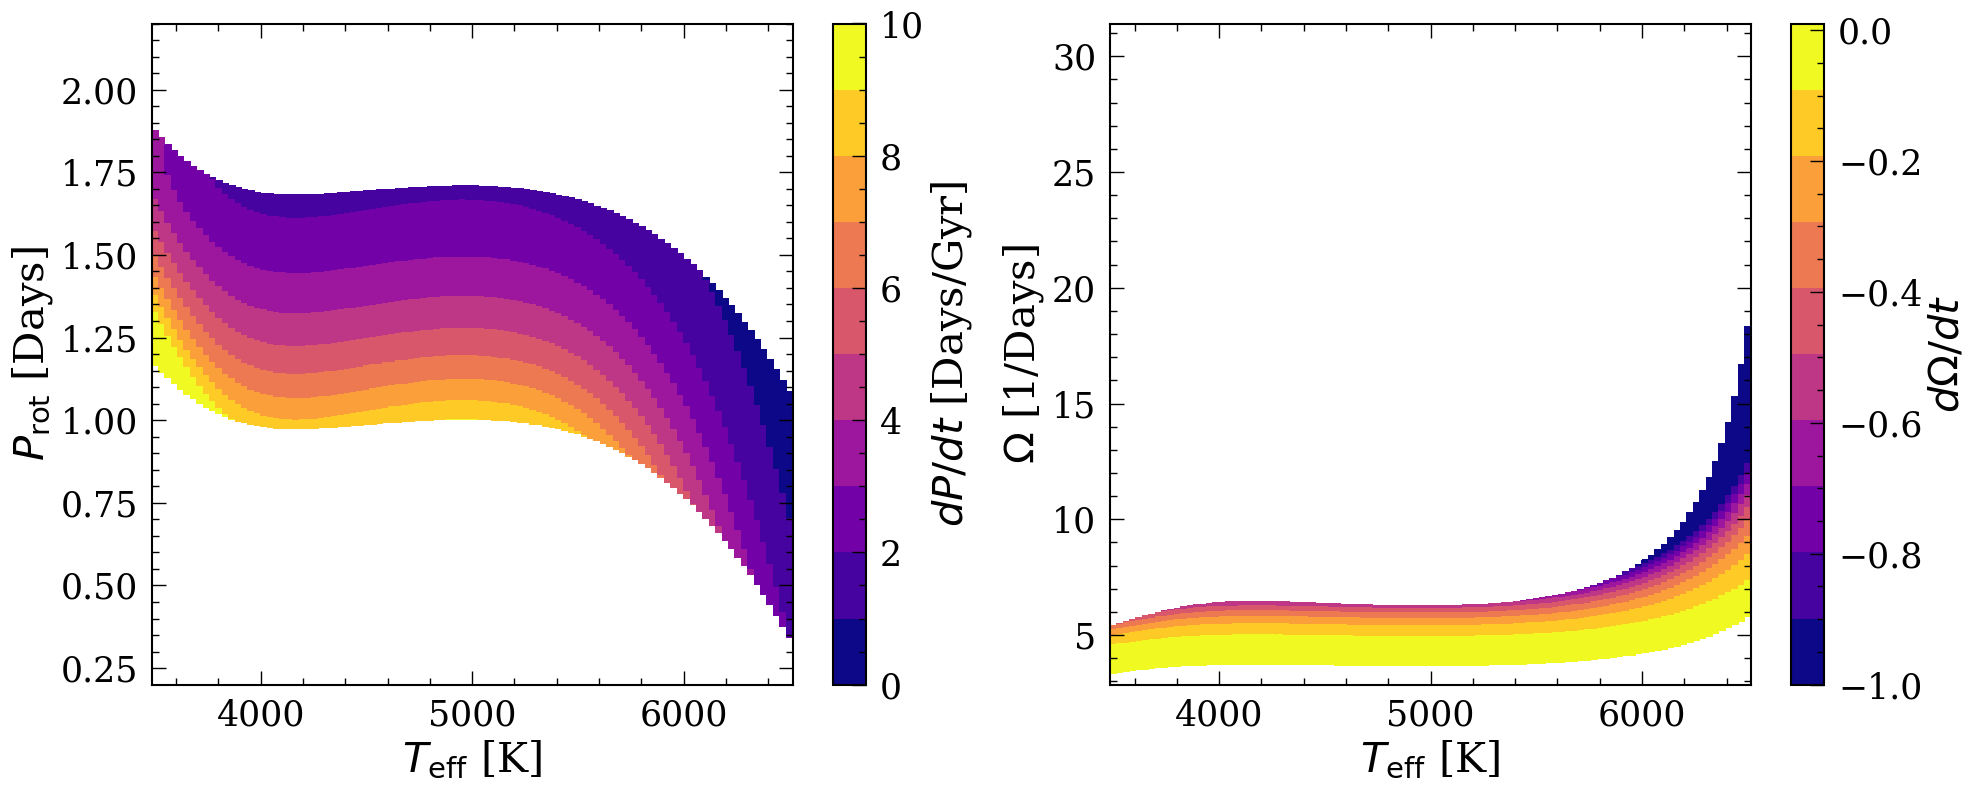

In [73]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
xx, yy = np.meshgrid(teffgrid, protgrid[:-1]/2+protgrid[1:]/2)
plt.pcolor(xx, yy, prot_dots_pc.T, vmin=0, vmax=10, 
           cmap=plt.get_cmap('plasma',10))
plt.colorbar(label='$dP/dt$ [Days/Gyr]')
plt.ylabel('$P_{\\rm rot}$ [Days]')
plt.xlabel('$T_{\\rm eff}$ [K]')


plt.subplot(1,2,2)
xx, yy = np.meshgrid(teffgrid, 2*np.pi/protgrid[:-1]/2+2*np.pi/protgrid[1:]/2)
plt.pcolor(xx, yy, o_dots_pc.T, vmin=-1, vmax=0.01, 
           cmap=plt.get_cmap('plasma',10))
plt.colorbar(label='$d\Omega/dt$')
plt.ylabel('$\Omega$ [1/Days]')
plt.xlabel('$T_{\\rm eff}$ [K]')

plt.tight_layout()

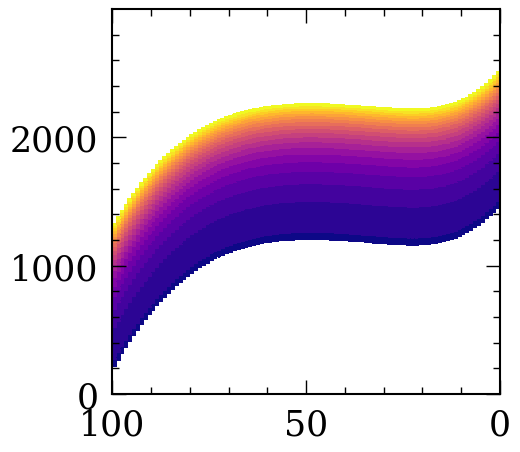

In [74]:
plt.figure(figsize=(5,5))
plt.pcolor(prot_ages_pc.T, 
           cmap=plt.get_cmap('plasma',20), 
           vmin=0,vmax=14)
plt.gca().invert_xaxis()

In [76]:
"""
plt.plot(Ro_plots_pc[10,:], np.log(-o_dots_pc[10,:]/o_plots_pc[10,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[10]))
plt.plot(Ro_plots_pc[80,:], np.log(-o_dots_pc[80,:]/o_plots_pc[80,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[80]))
plt.plot(Ro_plots_pc[90,:], np.log(-o_dots_pc[90,:]/o_plots_pc[90,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[90]))
plt.plot(Ro_plots_pc[99,:], np.log(-o_dots_pc[99,:]/o_plots_pc[99,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[99]))

plt.plot(Ro_plots[10,:], np.log(-o_dots[10,:]/o_plots[10,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[10]))
plt.plot(Ro_plots[80,:], np.log(-o_dots[80,:]/o_plots[80,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[80]))
plt.plot(Ro_plots[90,:], np.log(-o_dots[90,:]/o_plots[90,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[90]))
plt.plot(Ro_plots[99,:], np.log(-o_dots[99,:]/o_plots[99,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[99]))

#plt.legend()
plt.xscale('log')
plt.xlabel('$Ro$')
plt.ylabel('$n$')

"""

"\nplt.plot(Ro_plots_pc[10,:], np.log(-o_dots_pc[10,:]/o_plots_pc[10,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[10]))\nplt.plot(Ro_plots_pc[80,:], np.log(-o_dots_pc[80,:]/o_plots_pc[80,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[80]))\nplt.plot(Ro_plots_pc[90,:], np.log(-o_dots_pc[90,:]/o_plots_pc[90,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[90]))\nplt.plot(Ro_plots_pc[99,:], np.log(-o_dots_pc[99,:]/o_plots_pc[99,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[99]))\n\nplt.plot(Ro_plots[10,:], np.log(-o_dots[10,:]/o_plots[10,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[10]))\nplt.plot(Ro_plots[80,:], np.log(-o_dots[80,:]/o_plots[80,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[80]))\nplt.plot(Ro_plots[90,:], np.log(-o_dots[90,:]/o_plots[90,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[90]))\nplt.plot(Ro_plots[99,:], np.log(-o_dots[99,:]/o_plots[99,:]**3/4.05)/-1.4, label='T=%d K'%(teffgrid[99]))\n\n#plt.legend()\nplt.xscale('log')\nplt.xlabel('$Ro$')\nplt.ylabel('$n$')\n\n"